# DMA 

### Laminato quasi simmetrico 11 strati + 1(rc 200)


| spessore | ply    | tipo           | oientamento |
|----------|--------|----------------|-------------|
| 0.26     | RC-200 | Tessuto (fine) | 0/90        |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.47     | XC-400 | c-ply          | -45/+45     |
| 0.33     | UC-300 | unidirezionale | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.47     | XC-400 | C-ply          | -45/45      |
| 0.49     | RC-400 | Tessuto        | 0/90        |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Modulo_DMA import estrai,plottaggio,media,dispersione
from Composito import get_laminate,Q_ply,get_engineering_constants,get_compliance

f_min = 0
f_max = 100

# Variabili ausiliarie => nome file
name = []
name_2N = []
name_meta = []
name_2N_meta = []

for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
    name.append(f"CFRP_f1_100_5_1N_dietro_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_dietro_{i}")
    name_2N_meta.append(f"CFRP_f1_100_5_2N_{i}")
    name_meta.append(f"CFRP_f1_100_5_1N_{i}")

rc_200 = {'s':0.26,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_200','tessuto (fine)']}
rc_400 = {'s':0.49,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_400','tessuto']}
xc_400 = {'s':0.47,'Ex':57770,'Ey':57770,'v':0.03,'G':3186,'fabric':True,'theta':45,'meta':['xc_400','c-ply (-45/+45)']}
uc_300 = {'s':0.33,'Ex':118454,'Ey':7104,'v':0.29,'G':3531,'fabric':False,'theta':0,'meta':['uc_300','unidirezionale']}


spessore nominale

In [2]:
laminato = [rc_200,rc_400,xc_400,uc_300,uc_300,uc_300,rc_400,uc_300,uc_300,uc_300,xc_400,rc_400]
s = 0
for lamina in laminato: # definisco lo Spessore
    print(lamina['meta'])
    s += lamina['s']
print(s)

['rc_200', 'tessuto (fine)']
['rc_400', 'tessuto']
['xc_400', 'c-ply (-45/+45)']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['rc_400', 'tessuto']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['xc_400', 'c-ply (-45/+45)']
['rc_400', 'tessuto']
4.65


In [3]:
normalizza = False
flag_normalizza = 's' #s'

# Provino A

spostamento di dma/provino 1a/ massimo 0.110212 [mm]
spostamento di dma/provino 3a/ massimo 0.101837 [mm]
spostamento di dma/provino 12a/ massimo 0.110282 [mm]


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


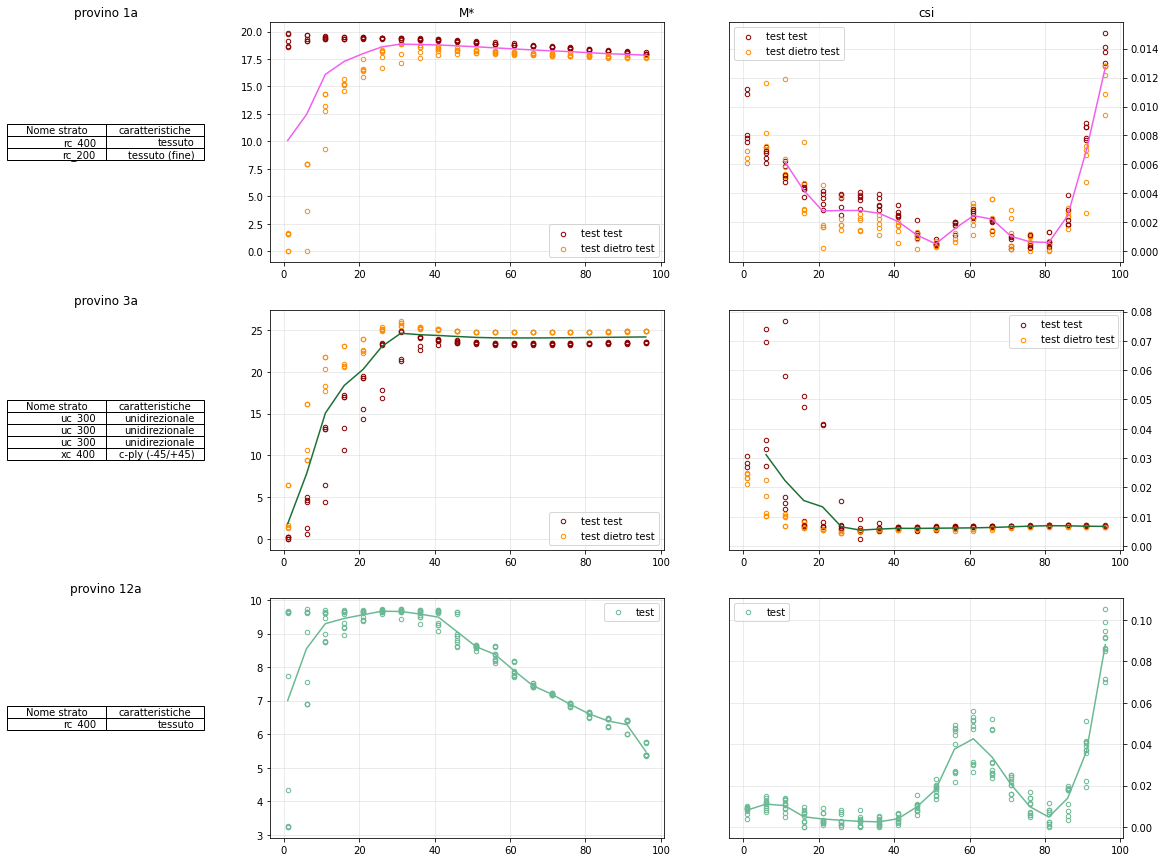

** Confonto prove provino 1A del 22/3 e quelle di febbraio
spostamento di dma/provino 1a vecchie/ massimo 0.14837799999999998 [mm]


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


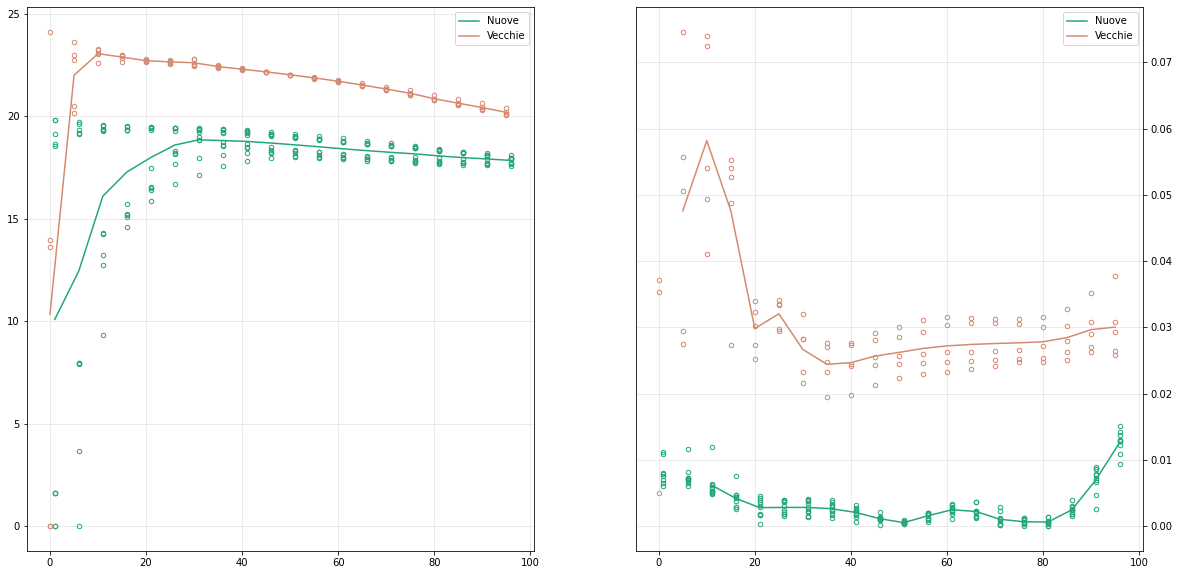

In [4]:
path_base = r'dma/provino 1a/'
laminato_provino_1a = {'name':'provino 1a','s':0.95,'w':12.41,'struttura':[rc_400,rc_200]}

data_provino_1a = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_1a[flag_normalizza])
path_base = r'dma/provino 3a/'

laminato_provino_3a =  {'name':'provino 3a','s':2.25,'w':12.39,'struttura':[uc_300,uc_300,uc_300,xc_400]}
data_provino_3a = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_3a[flag_normalizza])
path_base = r'dma/provino 12a/'
laminato_provino_12a = {'name':'provino 12a','s':0.69,'w':11.98,'struttura':[rc_400]}

data_provino_12a = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_12a[flag_normalizza])
#
#
widths = [1, 2, 2]
gs_kw = dict(width_ratios=widths)

fig,ax = plt.subplots(3,3,figsize=(20,3*5),gridspec_kw=gs_kw)
columns = ('Nome strato','caratteristiche')

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1a['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 1a')
plottaggio(data_provino_1a,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 2,flag_title = True)
(_,_,D,s) = get_laminate(laminato_provino_1a['struttura'])
#ax[0][1].hlines(D[0,0]*(12/(s**3)),f_min,f_max)


ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_3a['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title(laminato_provino_3a['name'])
plottaggio(data_provino_3a,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 2)

ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_12a['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 12a')
plottaggio(data_provino_12a,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)
plt.show()

print('** Confonto prove provino 1A del 22/3 e quelle di febbraio')
path_base = r'dma/provino 1a vecchie/'
data_provino_1a_old = estrai(path_base,1,name=name_meta,normalizza = True,s = laminato_provino_1a['s'])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1a,ax1,ax2,f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1a_old,ax1,ax2,f_min = f_min,flag_colore = 1)
ax1.legend(['Nuove','Vecchie'])
ax2.legend(['Nuove','Vecchie'])
plt.show()



## Provino B

spostamento di dma/provino 1b/ massimo 0.160304 [mm]
spostamento di dma/provino 1b/ massimo 0.10912700000000002 [mm]


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


spostamento di dma/provino 1-2b/ massimo 0.169031 [mm]
spostamento di dma/provino 3b/ massimo 0.112324 [mm]
spostamento di dma/provino 4b/ massimo 0.00786846 [mm]
spostamento di dma/provino 4b  vecchie/ massimo 0.10643299999999999 [mm]
spostamento di dma/provino 5b/ massimo 0.29247199999999995 [mm]


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Progra

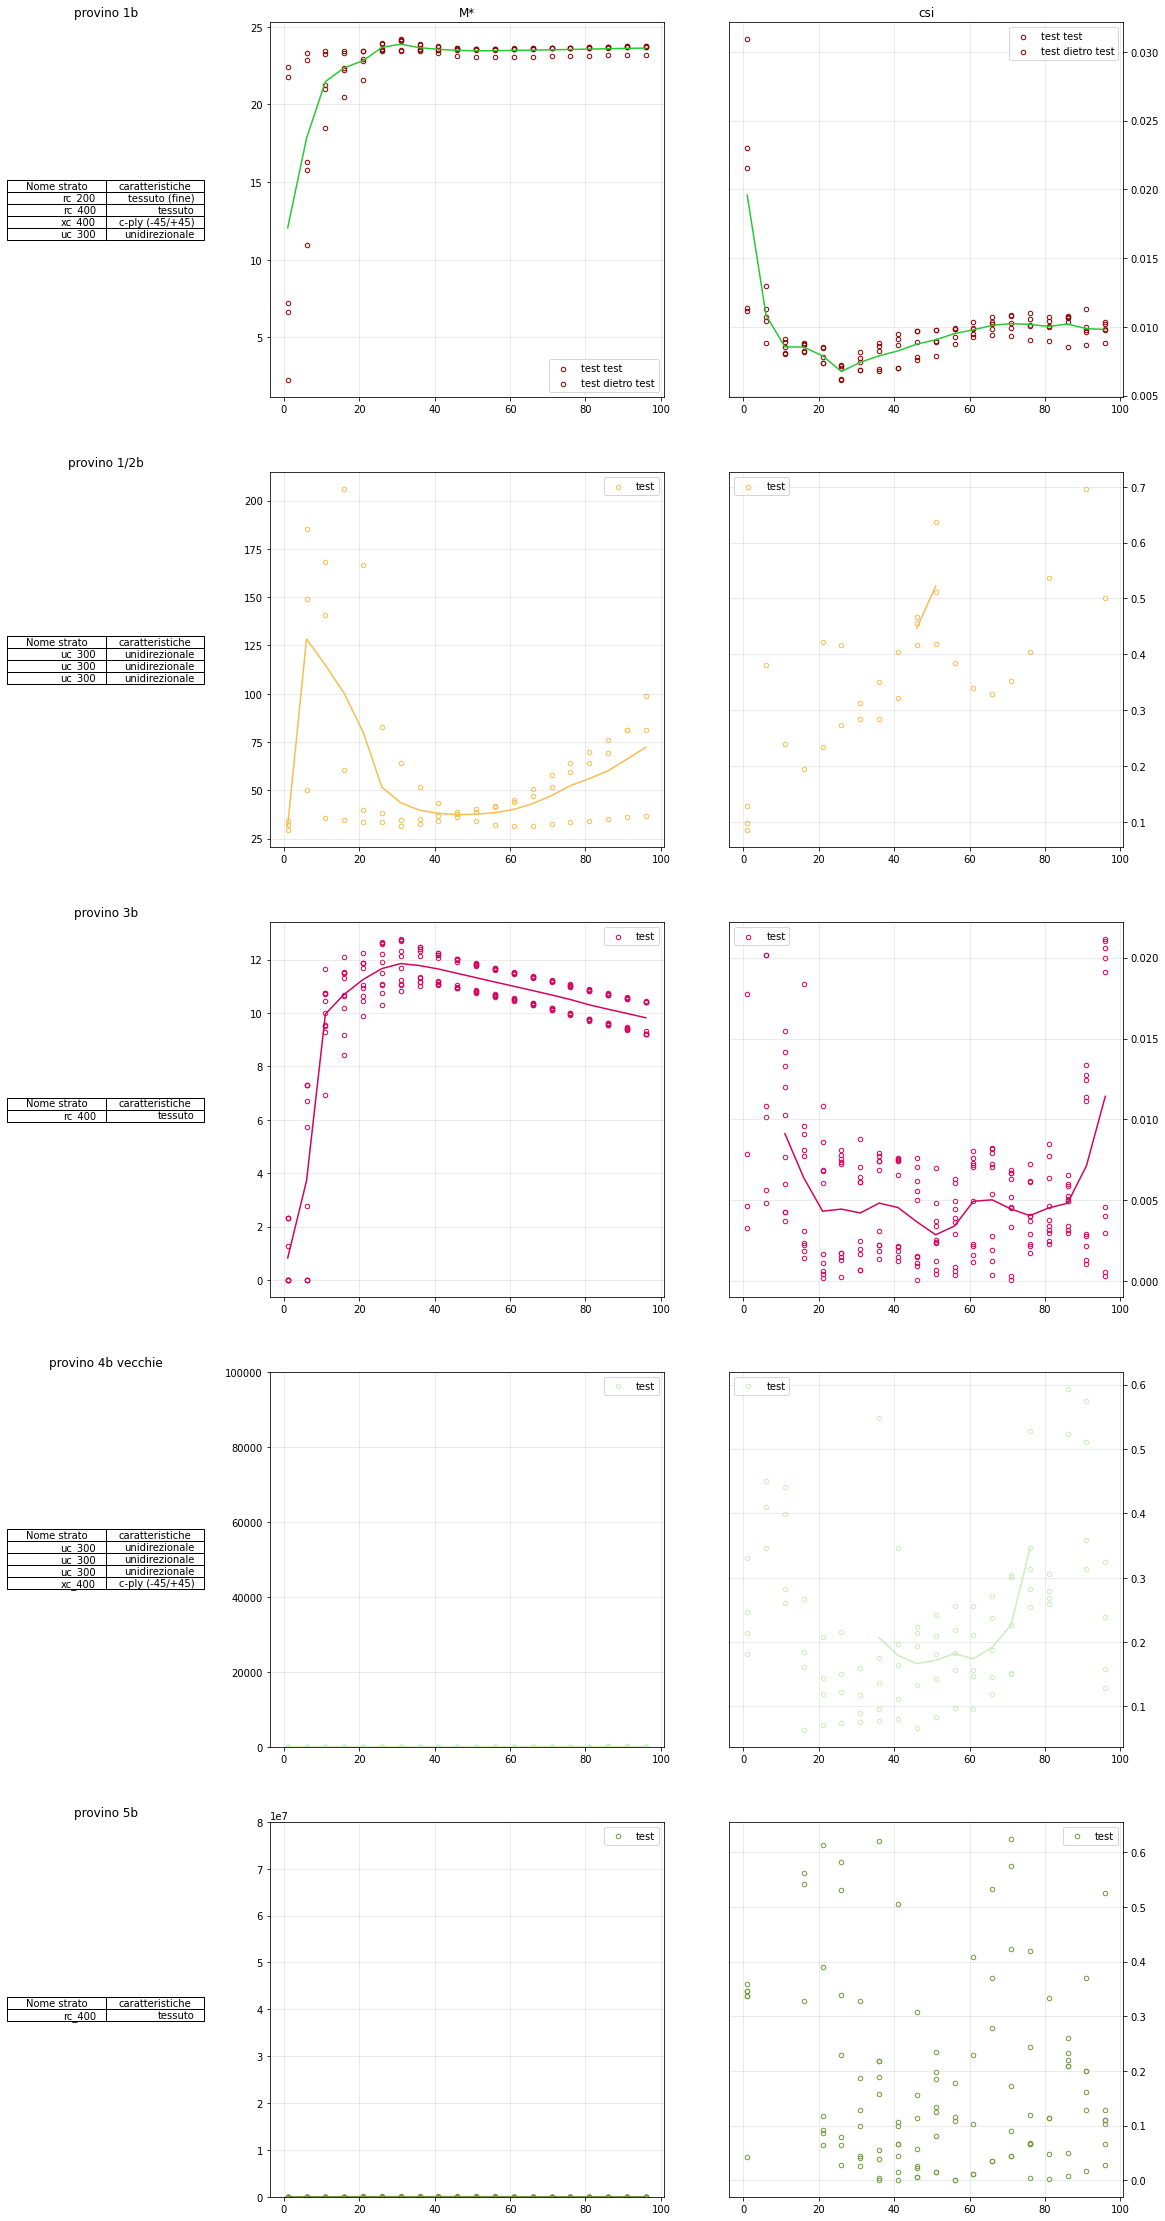

*Confronto 3b vecchio e nuovo


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


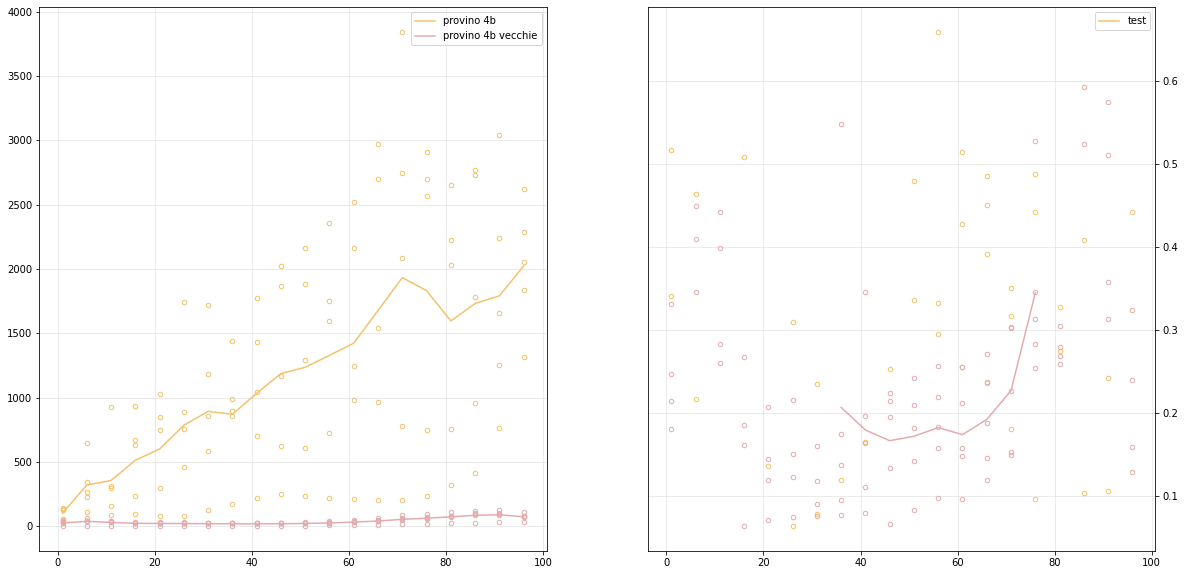

In [5]:

#
path_base = r'dma/provino 1b/'
laminato_provino_1b = {'name':'provino 1b','s':2.42,'w':12.53,'struttura':[rc_200,rc_400,xc_400,uc_300]}

data_provino_1b = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_1b[flag_normalizza])
data_provino_1b_2N = estrai(path_base,1,name=name_2N,normalizza = normalizza,s = laminato_provino_1b[flag_normalizza])

path_base = r'dma/provino 1-2b/'
name_temp = []
name_temp = name_meta[:]
name_temp.remove('CFRP_f1_100_5_1N_1')
name_temp.remove('CFRP_f1_100_5_1N_5')
laminato_provino_1_2b = {'name':'provino 1/2b','s':2.12,'w':6.95,'struttura':[uc_300,uc_300,uc_300]}

data_provino_1_2b = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_1_2b[flag_normalizza])
path_base = r'dma/provino 3b/'
laminato_provino_3b = {'name':'provino 3b','s':0.66,'w':12.12,'struttura':[rc_400]}
data_provino_3b = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_3b[flag_normalizza])
path_base = r'dma/provino 4b/'
laminato_provino_4b = {'name':'provino 4b','s':2.21,'w':12.3,'struttura':[uc_300,uc_300,uc_300,xc_400]}

data_provino_4b = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_4b[flag_normalizza])
path_base = r'dma/provino 4b  vecchie/'
data_provino_4b_old = estrai(path_base,1,name=name_2N_meta,normalizza = normalizza,s = laminato_provino_4b[flag_normalizza])
path_base = r'dma/provino 5b/'
laminato_provino_5b = {'name':'provino 5b','s':0.68,'w':12.61,'struttura':[rc_400]}
data_provino_5b = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_5b[flag_normalizza])
## ---------------------------------------------------------------------
fig,ax = plt.subplots(5,3,figsize=(20,4*10),gridspec_kw=gs_kw)

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 1b')
plottaggio(data_provino_1b,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 2,flag_title = True)

ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_1_2b['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title('provino 1/2b')
plottaggio(data_provino_1_2b,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)

ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 3b')
plottaggio(data_provino_3b,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)


ax[3][0].table(cellText=[ply['meta'] for ply in laminato_provino_4b['struttura']],colLabels=columns,loc='center')
ax[3][0].axis('off')
ax[3][0].set_title('provino 4b vecchie')
plottaggio(data_provino_4b_old,ax[3][1],ax[3][2],f_min = f_min,flag_colore = 1)
y_lim = 0.1*10**6
ax[3][1].set_ylim([0,y_lim])

ax[4][0].table(cellText=[ply['meta'] for ply in laminato_provino_5b['struttura']],colLabels=columns,loc='center')
ax[4][0].axis('off')
ax[4][0].set_title('provino 5b')
plottaggio(data_provino_5b,ax[4][1],ax[4][2],f_min = f_min,flag_colore = 1)
y_lim = 0.8*10**8
ax[4][1].set_ylim([0,y_lim])

plt.show()

print("*Confronto 3b vecchio e nuovo")
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_4b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4b_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
ax[0].legend(['provino 4b','provino 4b vecchie'])
plt.show()

# Provino C

spostamento di dma/provino 2c/ massimo 0.106462 [mm]
spostamento di dma/provino 3c/ massimo 0.07626229999999999 [mm]
spostamento di dma/provino 4c/ massimo 0.13662100000000002 [mm]


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


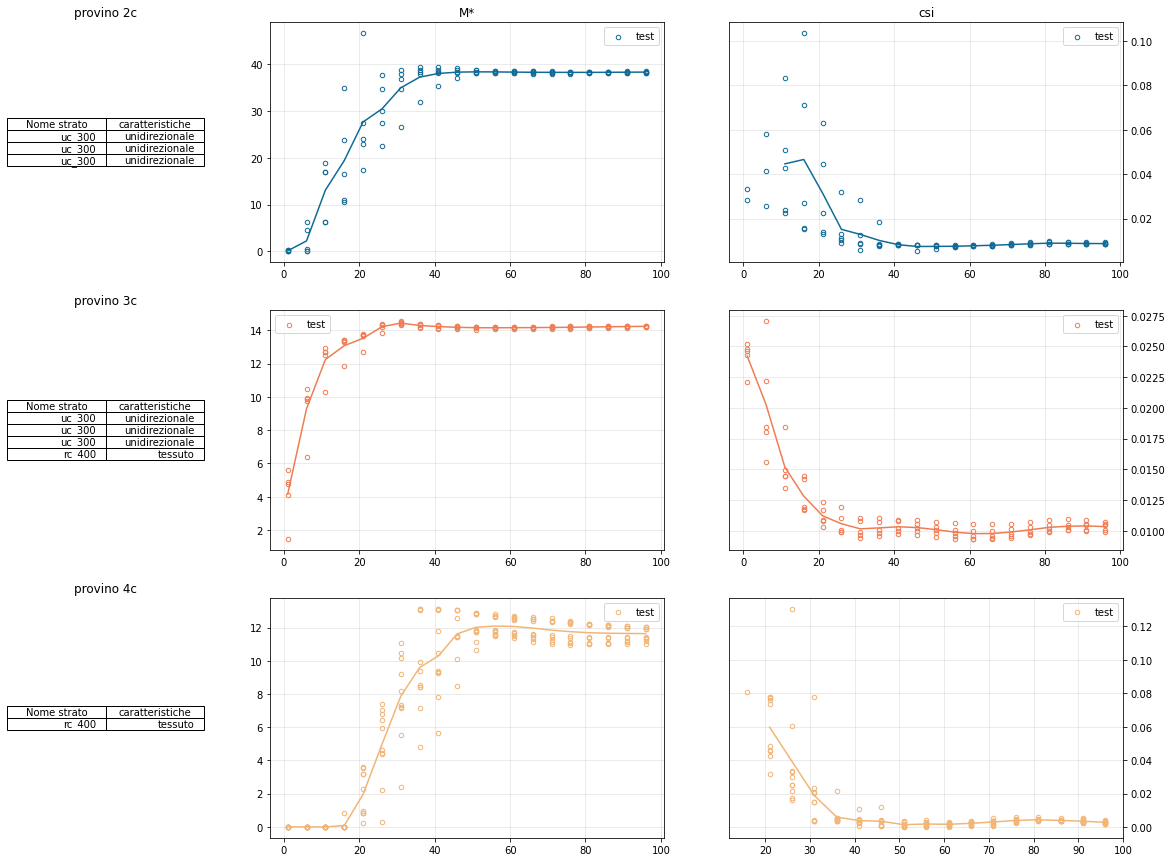

In [6]:
path_base = r'dma/provino 2c/'
laminato_provino_2c = {'name':'provino 2c','s':1.53,'w':3.13,'struttura':[uc_300,uc_300,uc_300]}

data_provino_2c = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_2c[flag_normalizza])

path_base = r'dma/provino 3c/'
laminato_provino_3c = {'name':'provino 3c','s':1.78,'w':11.66,'struttura':[uc_300,uc_300,uc_300,rc_400]} # [resina,resina,uc_300,resina,resina,uc_300,resina,resina,uc_300,resina,resina]

data_provino_3c = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_3c[flag_normalizza])

path_base = r'dma/provino 4c/'
laminato_provino_4c = {'name':'provino 4c','s':0.94,'w':11.46,'struttura':[rc_400]}

data_provino_4c = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_4c[flag_normalizza])
## ---------------------------------------------------------------------
fig,ax = plt.subplots(3,3,figsize=(20,3*5),gridspec_kw=gs_kw)

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 2c')

plottaggio(data_provino_2c,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 1,flag_title = True)

ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_3c['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title('provino 3c')

plottaggio(data_provino_3c,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)


ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 4c')
plottaggio(data_provino_4c,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)
plt.show()

# Combinato

## Fibre (uc 300)

C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


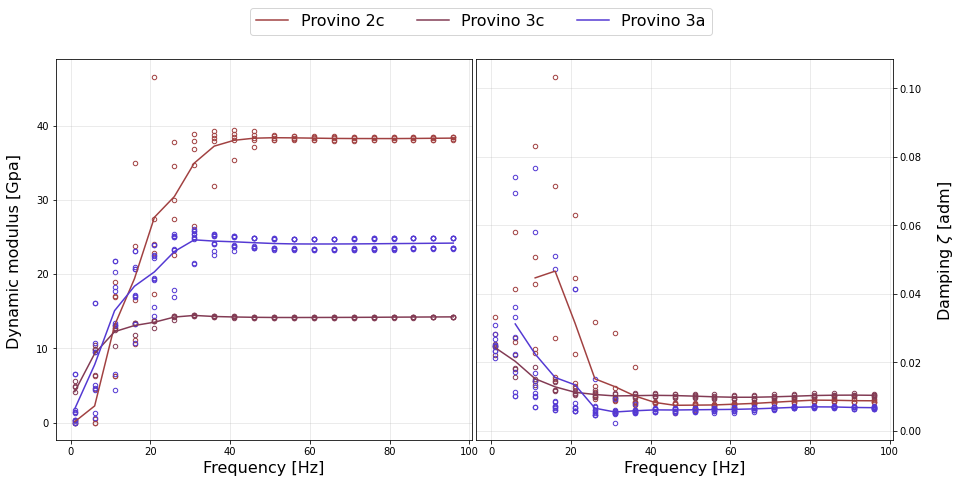

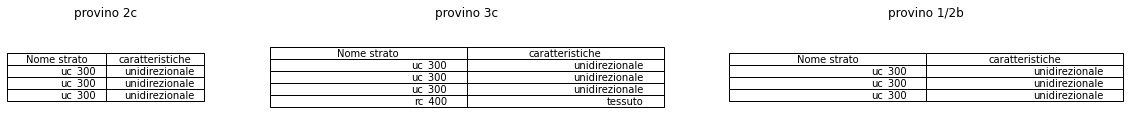

In [7]:
fig,ax = plt.subplots(1,2,figsize=(15,7),gridspec_kw = {'wspace':0.01, 'hspace':0})

plottaggio(data_provino_2c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
#plottaggio(data_provino_1_2b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3a,ax[0],ax[1],f_min = f_min,flag_colore = 1)

fig.text(0.08, 0.5, 'Dynamic modulus [Gpa]', va='center', rotation='vertical',fontsize=16)
fig.text(0.94, 0.5, 'Damping $\zeta$ [adm]', va='center', rotation='vertical',fontsize=16)
ax[1].yaxis.tick_right()
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.legend(['Provino 2c','Provino 3c','Provino 3a'],title='',ncol=5,fontsize=16, loc='upper center')
ax[0].set_xlabel('Frequency [Hz]',fontsize=16)
ax[1].set_xlabel('Frequency [Hz]',fontsize=16)
#ax[0].set_ylim([0,50000])
plt.show()
fig.savefig("confronto_fibre.pdf", bbox_inches='tight')


fig,ax = plt.subplots(1,3,figsize=(20,2),gridspec_kw=gs_kw)
columns = ('Nome strato','caratteristiche')
ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 2c')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_3c['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 3c')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_1_2b['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 1/2b')
plt.show()


## Tessuto RC 400

C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Progra

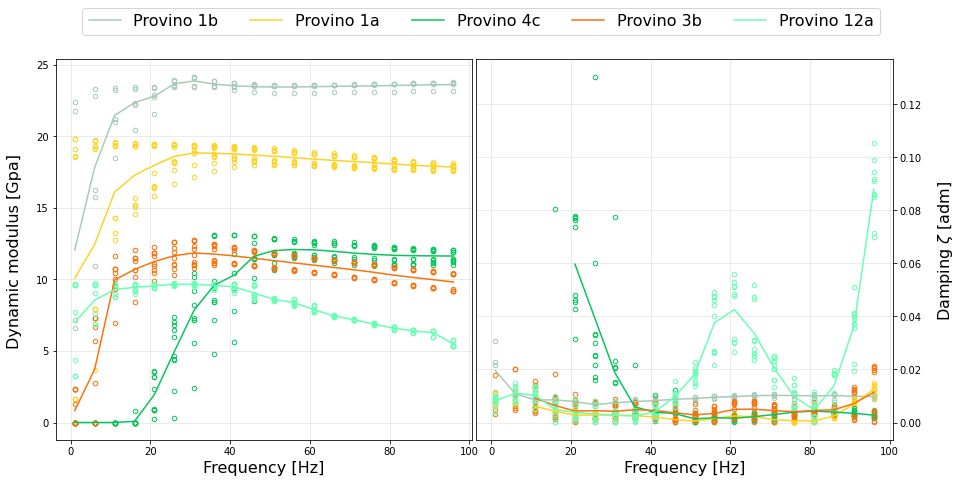

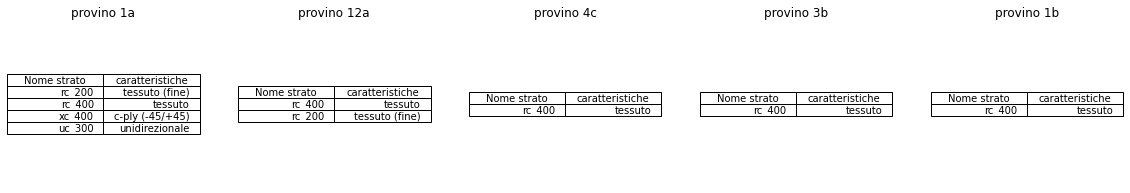

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,7),gridspec_kw = {'wspace':0.01, 'hspace':0})
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
# plottaggio(data_provino_1a_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_12a,ax[0],ax[1],f_min = f_min,flag_colore = 1)

fig.text(0.08, 0.5, 'Dynamic modulus [Gpa]', va='center', rotation='vertical',fontsize=16)
fig.text(0.94, 0.5, 'Damping $\zeta$ [adm]', va='center', rotation='vertical',fontsize=16)
ax[1].yaxis.tick_right()
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.legend(['Provino 1b','Provino 1a','Provino 4c','Provino 3b','Provino 12a'],title='',ncol=5,fontsize=16, loc='upper center')
ax[0].set_xlabel('Frequency [Hz]',fontsize=16)
ax[1].set_xlabel('Frequency [Hz]',fontsize=16)
plt.show()
fig.savefig("confronto_RC400.pdf", bbox_inches='tight')
##
fig,ax = plt.subplots(1,5,figsize=(20,3))
ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1a')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_1a['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 12a')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 4c')
ax[3].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[3].axis('off')
ax[3].set_title('provino 3b')
ax[4].table(cellText=[ply['meta'] for ply in laminato_provino_12a['struttura']],colLabels=columns,loc='center')
ax[4].axis('off')
ax[4].set_title('provino 1b')
plt.show()


# Insieme

C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


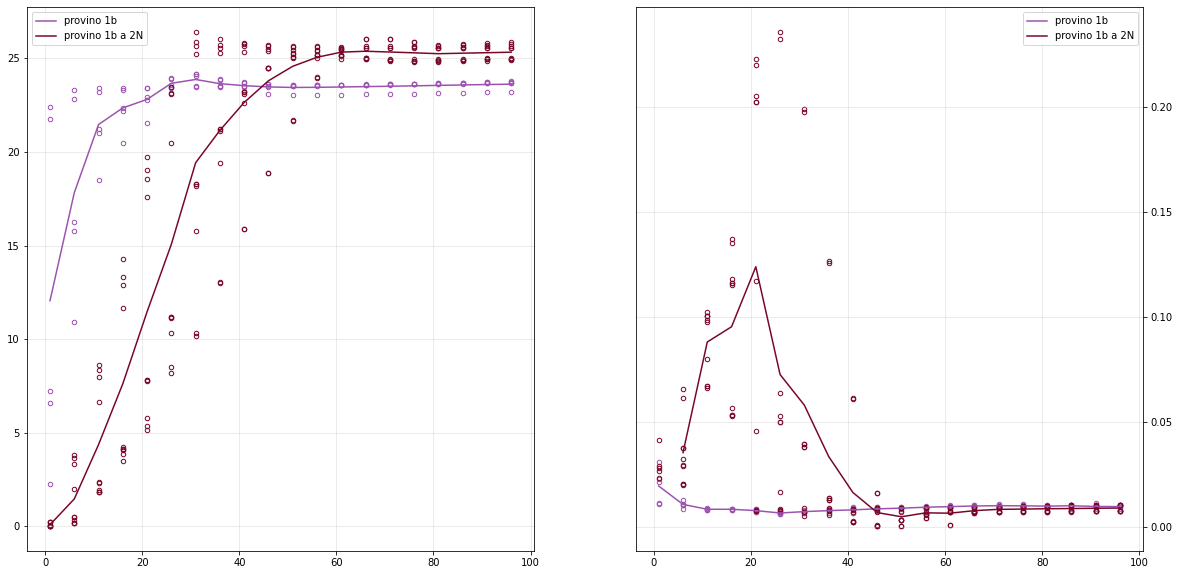

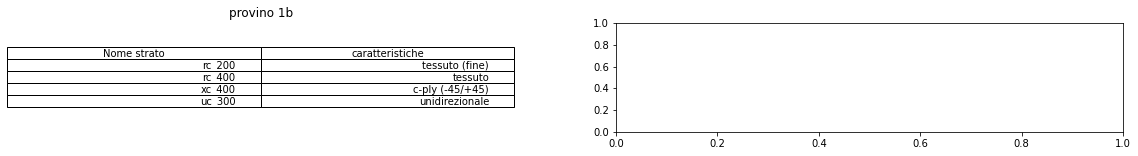

In [9]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b_2N,ax[0],ax[1],f_min = f_min,flag_colore = 1)

ax[1].legend(['provino 1b','provino 1b a 2N'])
ax[0].legend(['provino 1b','provino 1b a 2N'])
plt.show()

fig,ax = plt.subplots(1,2,figsize=(20,2))

ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1b')

plt.show()


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Progra

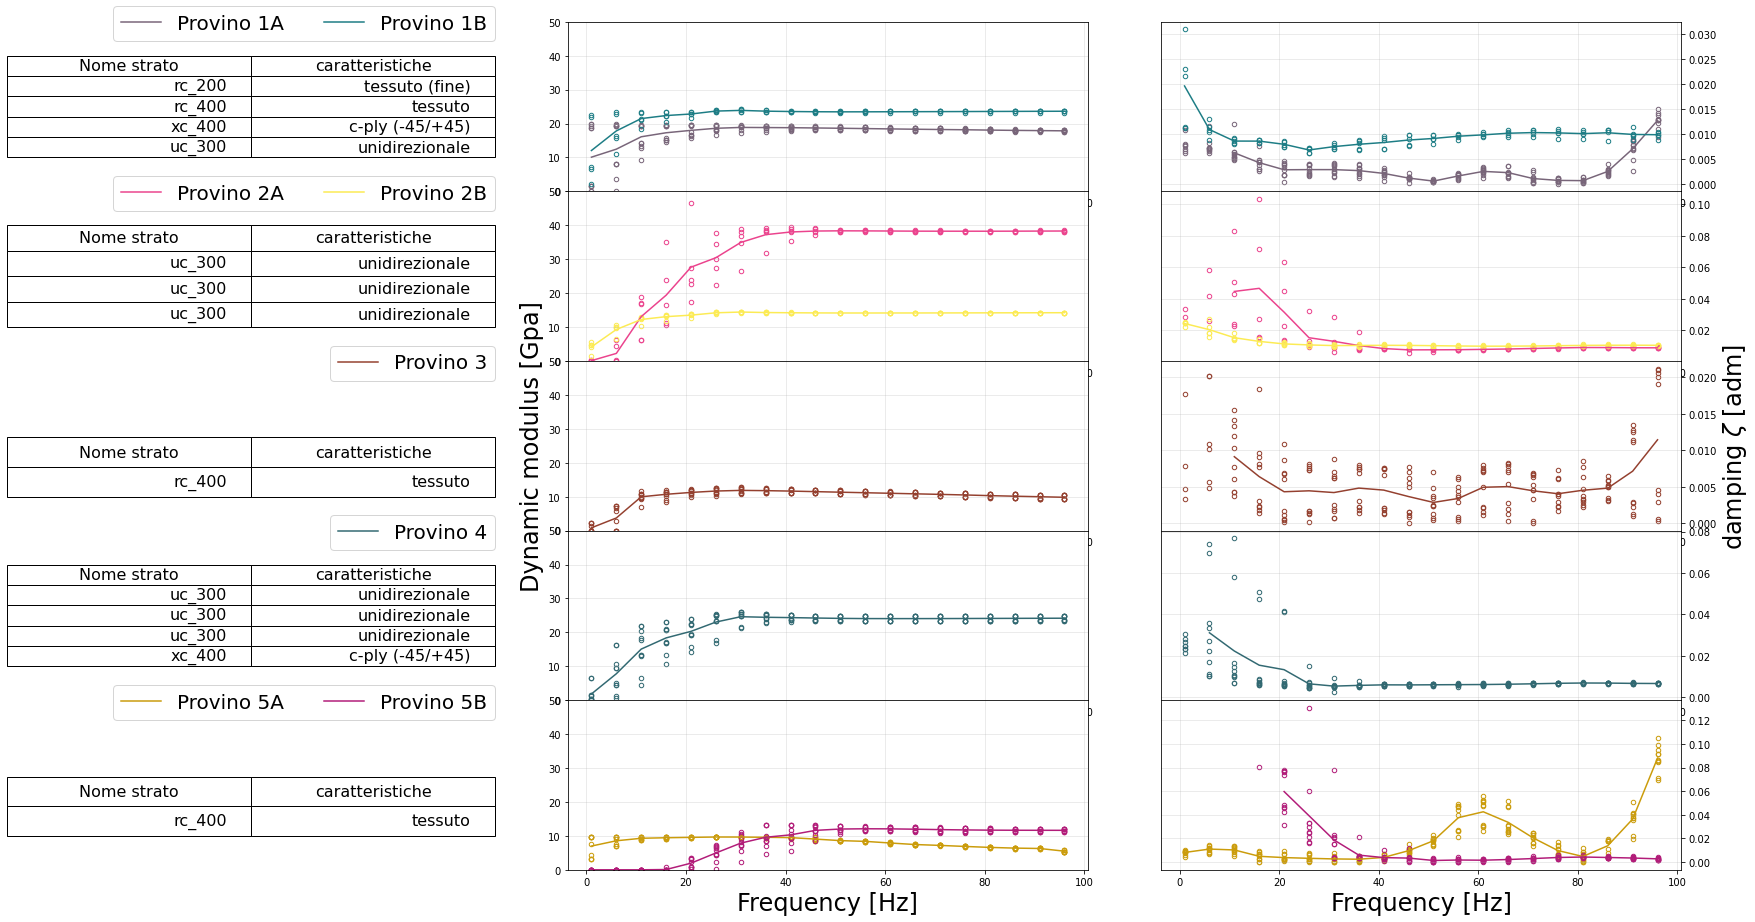

In [10]:
y_lim = 50000/1000
f_lim = 20
data = []
import matplotlib.gridspec as gridspec
font_legend = 8*2.5
bb_x = -0.12
bb_y = 1.15
size_x = 10*3
size_y = 5.2*3
fig = plt.figure(figsize=(size_x, size_y))
outer = gridspec.GridSpec(1, 3, wspace=1/7, hspace=0.2,width_ratios=[1.5,1.6,1.6])
ax = []
for outer_current in outer:
    inner = gridspec.GridSpecFromSubplotSpec(5, 1, subplot_spec=outer_current, hspace=0)
    col     = 0
    ax_col = []
    for _ in range(5):
        
        ax_col.append(plt.subplot(inner[col]))
        fig.add_subplot(ax_col[-1],sharex=True,aspect=10)        
        col += 1
    ax.append(ax_col)

# blocco 1
#ax[1][0].set_title('provino 1b',fontsize=8)
plottaggio(data_provino_1a,ax[1][0],ax[2][0],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b,ax[1][0],ax[2][0],f_min = f_min,flag_colore = 1)
ax[1][0].legend(['Provino 1A','Provino 1B'],title='',ncol=2,fontsize=font_legend,bbox_to_anchor=(bb_x,bb_y), loc='upper right')
ax[2][0].get_legend().remove()
ax[2][0].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][0].set_ylim([0,y_lim])

data.append({'valori':media(data_provino_1b,f_lim),'name':'Provino 1b'})
data.append({'valori':media(data_provino_1a,f_lim),'name':'Provino 1a'})
# blocco 2
#ax[1][1].set_title('provino 2c')
plottaggio(data_provino_2c,ax[1][1],ax[2][1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[1][1],ax[2][1],f_min = f_min,flag_colore = 1)
ax[1][1].legend(['Provino 2A','Provino 2B'],title='',ncol=2,fontsize=font_legend,bbox_to_anchor=(bb_x,bb_y), loc='upper right')
ax[2][1].get_legend().remove()
ax[2][1].set_ylabel('')
ax[1][1].set_ylabel('')

ax[1][1].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_2c,f_lim),'name':'Provino 2c'})
data.append({'valori':media(data_provino_3c,f_lim),'name':'Provino 3c'})

# blocco 3
#ax[1][2].set_title('provino 3b')
plottaggio(data_provino_3b,ax[1][2],ax[2][2],f_min = f_min,flag_colore = 1)
ax[1][2].legend(['Provino 3'],title='',ncol=2,fontsize=font_legend,bbox_to_anchor=(bb_x,bb_y), loc='upper right')
ax[2][2].get_legend().remove()
ax[2][2].set_ylabel('')
ax[1][2].set_ylabel('')

ax[1][2].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_3b,f_lim),'name':'Provino 3b'})
# label!!
ax[1][2].set_ylabel('Dynamic modulus [Gpa]', fontsize=16*1.5)
ax[2][2].yaxis.set_label_position("right")
ax[2][2].set_ylabel('damping $\zeta$ [adm]', fontsize=16*1.5)
#fig.text(0.55, 0.08, 'Frequency [Hz]', ha='center',fontsize=16*1.5)


# blocco 4
#ax[1][3].set_title('provino 3a')
plottaggio(data_provino_3a,ax[1][3],ax[2][3],f_min = f_min,flag_colore = 1)
ax[1][3].legend(['Provino 4'],title='',ncol=2,fontsize=font_legend,bbox_to_anchor=(bb_x,bb_y), loc='upper right')
ax[2][3].get_legend().remove()
ax[2][3].set_ylabel('')
ax[1][3].set_ylabel('')

ax[1][3].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_3a,f_lim),'name':'Provino 3a'})
# blocco 5
#ax[1][4].set_title('provino 4c')
plottaggio(data_provino_12a,ax[1][4],ax[2][4],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[1][4],ax[2][4],f_min = f_min,flag_colore = 1)
ax[1][4].legend(['Provino 5A','Provino 5B'],title='',ncol=2,fontsize=font_legend,bbox_to_anchor=(bb_x,bb_y), loc='upper right')
ax[2][4].get_legend().remove()
ax[1][4].set_ylim([0,y_lim])
ax[1][4].set_xlabel('Frequency [Hz]', fontsize=16*1.5)
ax[2][4].set_xlabel('Frequency [Hz]', fontsize=16*1.5)
data.append({'valori':media(data_provino_12a,f_lim),'name':'provino 12a'})
data.append({'valori':media(data_provino_4c,f_lim),'name':'provino 4c'})

font_table = 16
table=ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center',bbox=[0,0.2,1,0.6])
table.auto_set_font_size(False)
table.set_fontsize(font_table)
ax[0][0].axis('off')
table=ax[0][1].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center',bbox=[0,0.2,1,0.6])
table.auto_set_font_size(False)
table.set_fontsize(font_table)
ax[0][1].axis('off')
table=ax[0][2].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center',bbox=[0,0.2,1,0.35])
table.auto_set_font_size(False)
table.set_fontsize(font_table)
ax[0][2].axis('off')
table=ax[0][3].table(cellText=[ply['meta'] for ply in laminato_provino_3a['struttura']],colLabels=columns,loc='center',bbox=[0,0.2,1,0.6])
table.auto_set_font_size(False)
table.set_fontsize(font_table)
ax[0][3].axis('off')
table=ax[0][4].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center',bbox=[0,0.2,1,0.35])
table.auto_set_font_size(False)
table.set_fontsize(font_table)
ax[0][4].axis('off') 

plt.show()
fig.savefig("complessivo.pdf", bbox_inches='tight')


In [11]:
data

[{'valori': (0.00911414822416542, 23.52296875), 'name': 'Provino 1b'},
 {'valori': (0.002839559085292965, 18.365218750000004), 'name': 'Provino 1a'},
 {'valori': (0.01051943116052365, 36.85208), 'name': 'Provino 2c'},
 {'valori': (0.010230193413361278, 14.165538750000001), 'name': 'Provino 3c'},
 {'valori': (0.004927345807197216, 10.964148125), 'name': 'Provino 3b'},
 {'valori': (0.006818194844401905, 23.872815625), 'name': 'Provino 3a'},
 {'valori': (0.02070538302453251, 8.0115906875), 'name': 'provino 12a'},
 {'valori': (0.009960115628610336, 10.29358415625), 'name': 'provino 4c'}]

C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Progra

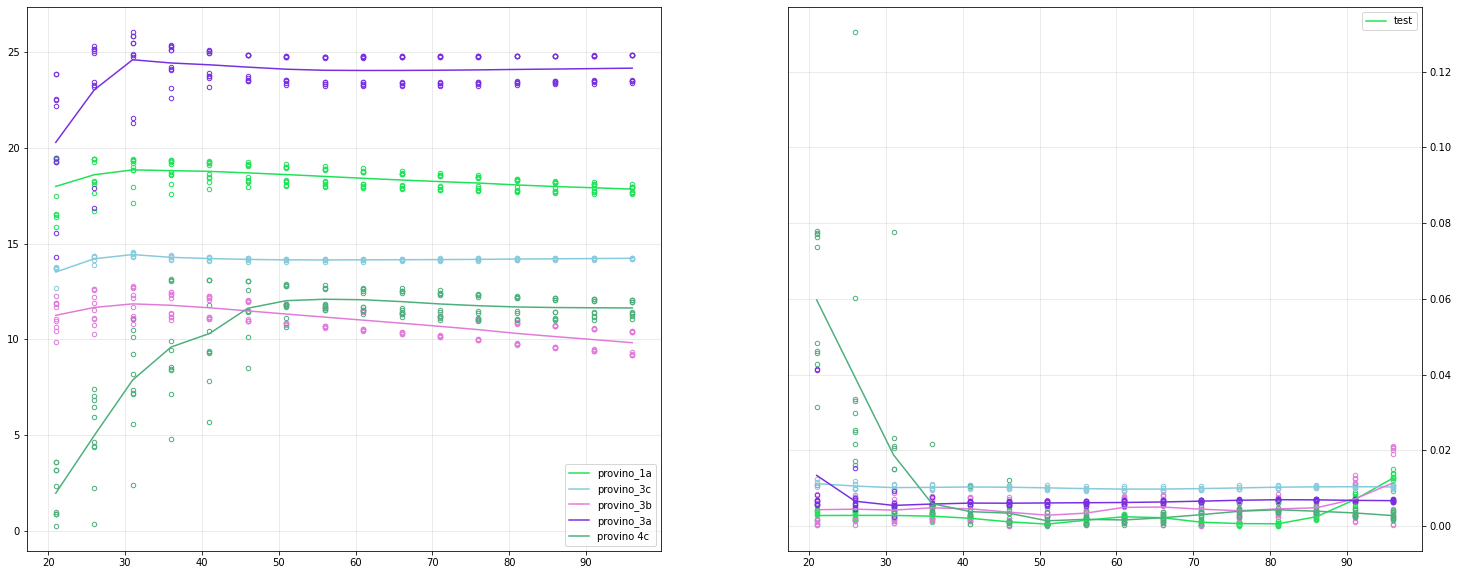

In [12]:
_,ax = plt.subplots(1,2,figsize=(25,10))
f_min = 20
plottaggio(data_provino_1a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
#plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)

#plottaggio(data_provino_2c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[0],ax[1],f_min = f_min,flag_colore = 1)

plottaggio(data_provino_3b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
#plottaggio(data_provino_12a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
ax[0].legend(['provino_1a','provino_3c','provino_3b','provino_3a','provino 4c'])

plt.show()

C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


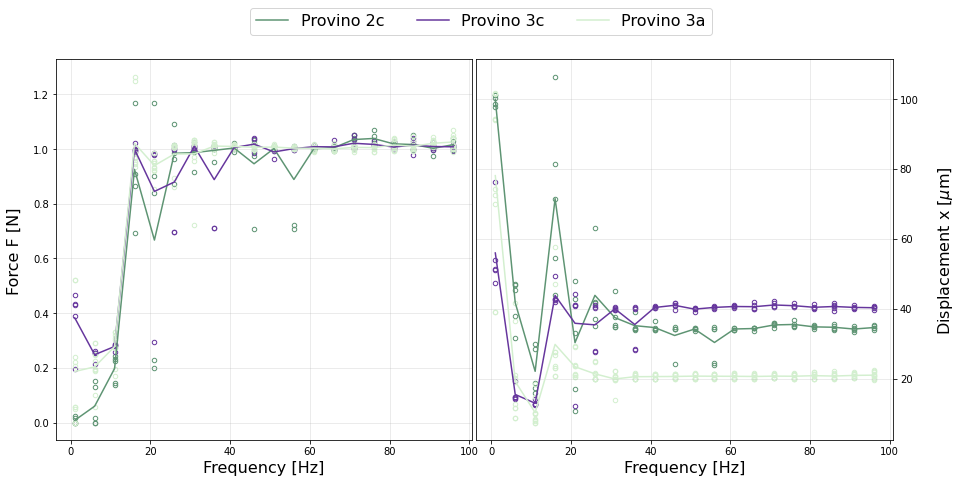

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,7),gridspec_kw = {'wspace':0.01, 'hspace':0})
lista_name = [name_meta,name_meta,name]
lista = [data_provino_2c,data_provino_3c,data_provino_3a]
k = 0
for data in lista:
    colore = '#%02x%02x%02x' % (np.random.randint(256),np.random.randint(256),np.random.randint(256))
    
    N = len(lista_name[k])
    F_media = np.zeros(data.loc[name[0]]['f'].size)
    x_media = np.zeros(data.loc[name[0]]['f'].size)
    for i in lista_name[k]:
        data.loc[i].plot.scatter(x='f',y='F',ax = ax[0],color='none',edgecolors = colore)
        data.loc[i].plot.scatter(x='f',y='x',ax = ax[1],color='none',edgecolors = colore)
        F_media += data.loc[i]['F'].to_numpy()/(N)
        x_media += data.loc[i]['x'].to_numpy()/(N)
    k += 1
    ax[0].plot(data.loc[i]['f'],F_media,color=colore)
    ax[1].plot(data.loc[i]['f'],x_media,color=colore)
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].grid(which='both',alpha=0.3)
ax[1].grid(which='major',alpha=0.3)

fig.text(0.08, 0.5, 'Force F [N]', va='center', rotation='vertical',fontsize=16)
fig.text(0.94, 0.5, 'Displacement x [$\mu$m]', va='center', rotation='vertical',fontsize=16)
ax[1].yaxis.tick_right()
fig.legend(['Provino 2c','Provino 3c','Provino 3a'],title='',ncol=5,fontsize=16, loc='upper center')
ax[0].set_xlabel('Frequency [Hz]',fontsize=16)
ax[1].set_xlabel('Frequency [Hz]',fontsize=16)
plt.show()
fig.savefig("forza_spostamento.pdf", bbox_inches='tight', pad_inches = 0)


## prove a trazione

In [14]:

name_10N_meta = []
for i in range(1,6):
    name_10N_meta.append(f"CFRP_f1_100_5_10N_{i}")
path_base = r'dma/Trazione/provino 2d/'
laminato_provino_2d = {'name':'provino 2d','s':0.68,'w':0,'struttura':[rc_400]}
data_provino_2d = estrai(path_base,1,name=name_10N_meta,normalizza = normalizza,s = laminato_provino_2d[flag_normalizza])

path_base = r'dma/Trazione/provino 3d/'
laminato_provino_3d = {'name':'provino 3d','s':0,'w':0,'struttura':[uc_300]}
data_provino_3d = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_2d[flag_normalizza])

spostamento di dma/Trazione/provino 2d/ massimo 0.00174863 [mm]
spostamento di dma/Trazione/provino 3d/ massimo 0.000189019 [mm]


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


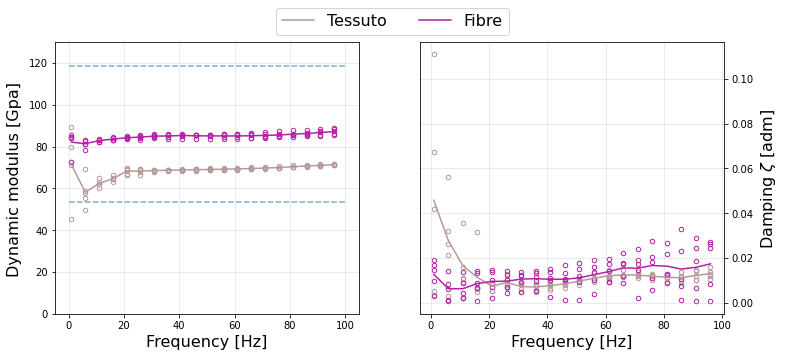

In [15]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
plottaggio(data_provino_2d,ax[0],ax[1],flag_colore = 1)
plottaggio(data_provino_3d,ax[0],ax[1],flag_colore = 1)

y_lim = 120000/1000
ax[0].set_ylim([0,y_lim])
#ax[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax[1].yaxis.tick_right()
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.legend(['Tessuto','Fibre'],title='',ncol=2,fontsize=16, loc='upper center')
ax[0].set_xlabel('Frequency [Hz]',fontsize=16)
ax[1].set_xlabel('Frequency [Hz]',fontsize=16)

fig.text(0.07, 0.5, 'Dynamic modulus [Gpa]', va='center', rotation='vertical',fontsize=16)
fig.text(0.94, 0.5, 'Damping $\zeta$ [adm]', va='center', rotation='vertical',fontsize=16)


ax[0].hlines(rc_400['Ex']/1000,0,100,linestyle='--',alpha=0.6)
ax[0].hlines(uc_300['Ex']/1000,0,100,linestyle='--',alpha=0.6)
ax[0].axis([None,None,0,130])
plt.show()
fig.savefig("confronto_trazione.pdf", bbox_inches='tight')

#fig.suptitle('Confronto a trazione', fontsize=16)


#fig.text(0.5, 0.03, 'Frequency [Hz]', ha='center',fontsize=16)

In [16]:
path_base = r'dma/Trazione/provino 1d/'
name_temp = ['CFRP_f1_100_5_1N']
data_provino_1d_force_f_1N = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_2d[flag_normalizza])
name_temp = ['CFRP_f1_100_5_5N']
data_provino_1d_force_f_5N = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_2d[flag_normalizza])
name_temp = ['CFRP_f1_100_5_10N']

data_provino_1d_force_f_10N = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_2d[flag_normalizza])

name_temp = ['CFRP_FORCE_1_10N_30Hz']
data_provino_1d_force = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_2d[flag_normalizza])


path_base = r'dma/Trazione/provino 2d/'
name_temp = ['CFRP_FORCE_1_20N_30Hz']
data_provino_2d_force = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_2d[flag_normalizza])
#name_temp = ['CFRP_FORCE_1_10N_30Hz']
#data_provino_2d_force = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_2d[flag_normalizza])

path_base = r'dma/Trazione/provino 3d/'
name_temp = ['CFRP_1_100Hz_5N']
data_provino_3d_force_f = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_3d[flag_normalizza])
name_temp = ['CFRP_FORCE_1_20N_30Hz']
data_provino_3d_force = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_3d[flag_normalizza])


spostamento di dma/Trazione/provino 1d/ massimo 0.000202045 [mm]
spostamento di dma/Trazione/provino 1d/ massimo 0.00101928 [mm]
spostamento di dma/Trazione/provino 1d/ massimo 0.00206132 [mm]
spostamento di dma/Trazione/provino 1d/ massimo 0.0019787900000000002 [mm]
spostamento di dma/Trazione/provino 2d/ massimo 0.00352717 [mm]
spostamento di dma/Trazione/provino 3d/ massimo 0.00103809 [mm]
spostamento di dma/Trazione/provino 3d/ massimo 0.00629403 [mm]


### Force

C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


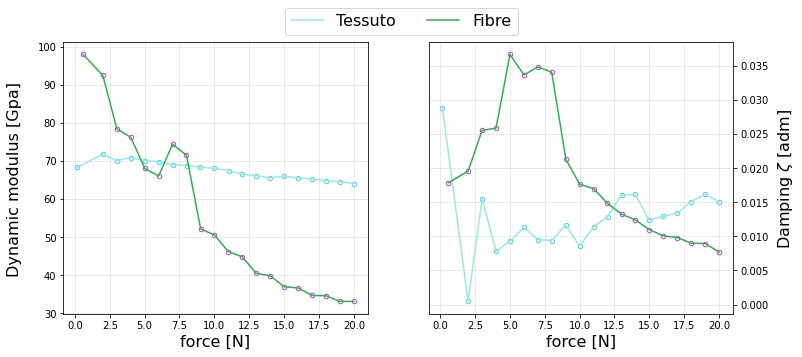

In [31]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

#plottaggio(data_provino_1d_force,ax[0],ax[1],x='F',flag_title=True)
plottaggio(data_provino_2d_force,ax[0],ax[1],x='F',flag_title=True)
plottaggio(data_provino_3d_force,ax[0],ax[1],x='F',flag_title=True)

ax[1].set_title('')
ax[0].set_title('')


ax[0].get_legend().remove()
ax[1].get_legend().remove()

ax[1].yaxis.tick_right()
fig.legend(['Tessuto','Fibre'],title='',ncol=2,fontsize=16, loc='upper center')
ax[0].set_xlabel('force [N]',fontsize=16)
ax[1].set_xlabel('force [N]',fontsize=16)

fig.text(0.06, 0.5, 'Dynamic modulus [Gpa]', va='center', rotation='vertical',fontsize=16)
fig.text(0.95, 0.5, 'Damping $\zeta$ [adm]', va='center', rotation='vertical',fontsize=16)

plt.show()
fig.savefig("confronto_forza.pdf", bbox_inches='tight')


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Rodo\AppData\Local\Progra

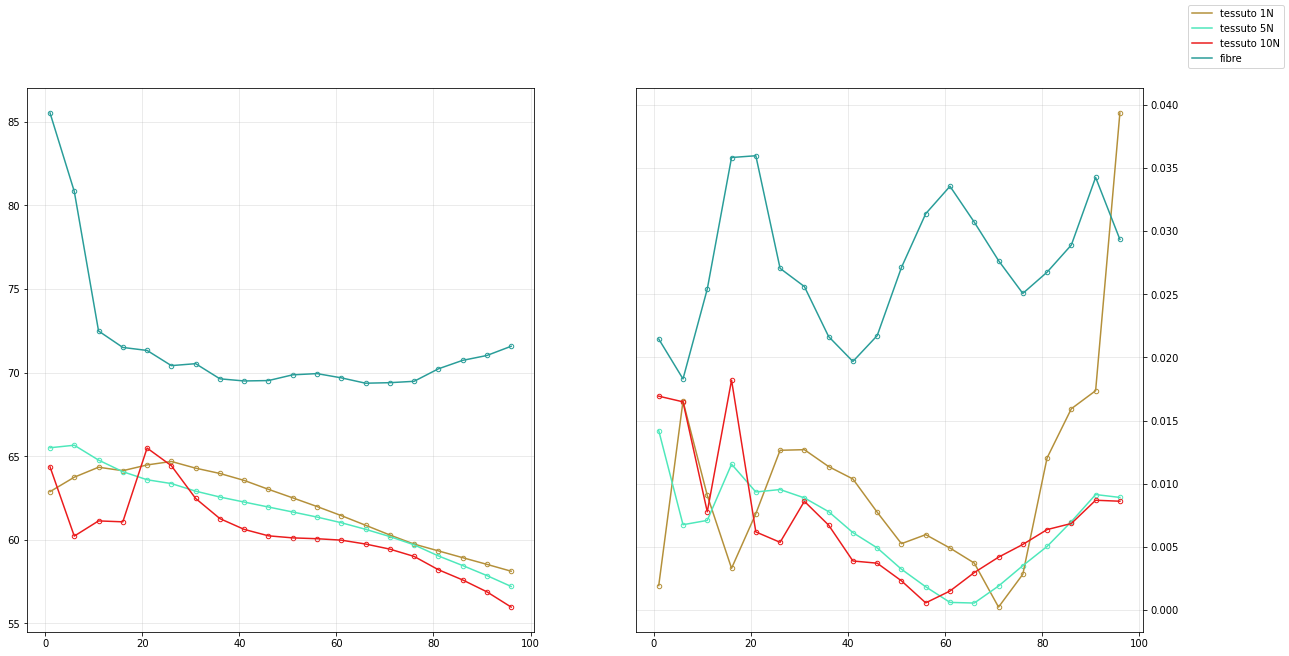

In [27]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

plottaggio(data_provino_1d_force_f_1N,ax[0],ax[1],flag_colore = 1)
plottaggio(data_provino_1d_force_f_5N,ax[0],ax[1],flag_colore = 1)
plottaggio(data_provino_1d_force_f_10N,ax[0],ax[1],flag_colore = 1)

plottaggio(data_provino_3d_force_f,ax[0],ax[1],flag_colore = 1)
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.legend(['tessuto 1N','tessuto 5N','tessuto 10N','fibre'])
plt.show()